In [8]:
import h5py
from matplotlib import pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline



In [ ]:
FONTS = ['Skylark', 'Ubuntu Mono', 'Sweet Puppy']

file_name = "font_recognition_train_set/SynthText.h5"

db = h5py.File(file_name, "r")
im_names = list(db["data"].keys())

num_of_images = len(im_names)

i = 15 # Choose image

img_name = im_names[i]
img = db['data'][img_name][:]
font = db['data'][img_name].attrs['font']
txt = db['data'][img_name].attrs['txt']
charBB = db['data'][img_name].attrs['charBB']
wordBB = db['data'][img_name].attrs['wordBB']

print(txt)

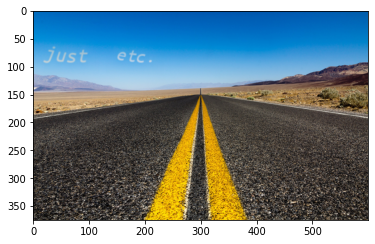

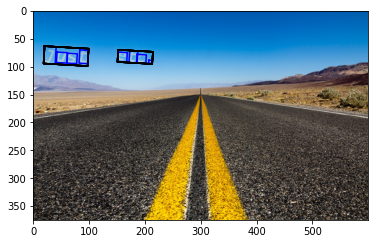

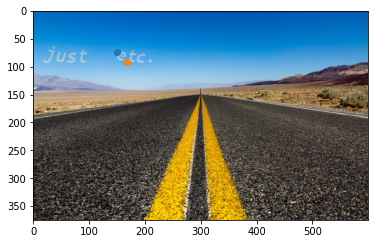

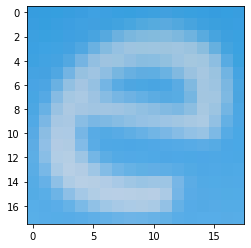

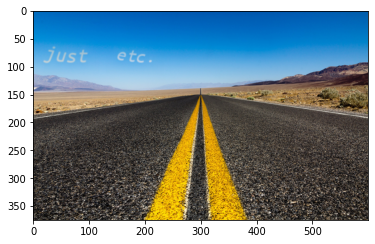

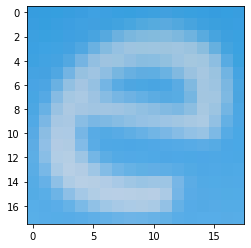

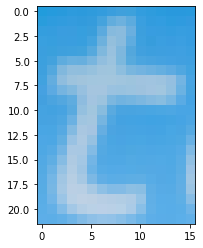

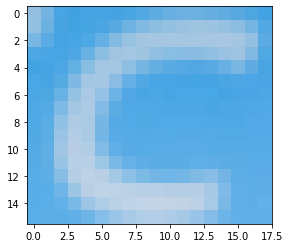

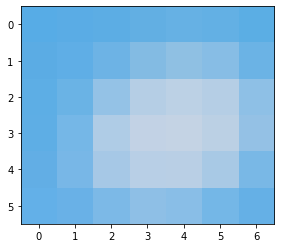

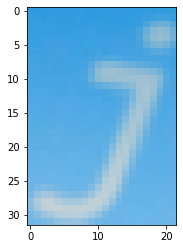

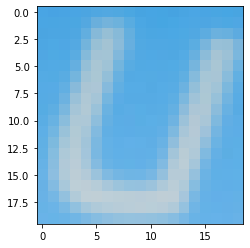

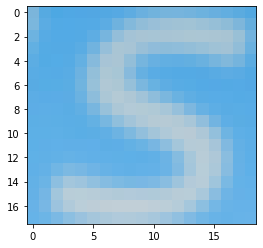

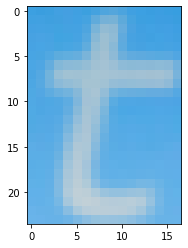

In [7]:
number_of_chars = charBB.shape[-1]

# Plot original image
plt.imshow(img)

# Draw the background image (the image itself)
img_copy = img.copy()
plt.figure()
plt.imshow(img_copy)

points = []

# Draw the bounding boxes FOR THE CHARACTERS.
for char_index in range(number_of_chars):
    font_name = font[char_index].decode('UTF-8')
    if (font_name == FONTS[0]):
        color = 'r'
    elif (font_name == FONTS[1]):
        color = 'b'
    else:
        color = 'g'
    bb = charBB[:, :, char_index]
    bb_x = np.append(bb[0, :], bb[0, 0])
    bb_y = np.append(bb[1, :], bb[1, 0])
    plt.plot(bb_x, bb_y, color)

    # Last index is duplicate of first value.
    # It is done because we need to complete the rectangle (loop)
    # i.e.: 1->2, 2->3, 3->4, 4->1 (so point 1, point 2, point 3, point 4, point 1 to complete the loop)

    # Draw the bounding boxes FOR THE WORDS.
    number_of_words = wordBB.shape[-1]
    for word_index in range(number_of_words):
        bb = wordBB[:, :, word_index]
        x = np.append(bb[0, :], bb[0, 0])
        y = np.append(bb[1, :], bb[1, 0])
        #print(f"Word {word_index} bb_x: {x} bb_y: {y}")
        plt.plot(x, y, 'k')

    x = bb_x[:4]
    y = bb_y[:4]
    points.append((x,y))

assert number_of_chars == len(points)

plt.figure()
plt.imshow(img)

point = points[0]
x,y = point
x_min, y_min, x_max, y_max = np.min(x).astype(np.int32), np.min(y).astype(np.int32), np.max(x).astype(np.int32), np.max(y).astype(np.int32)
plt.plot(x_min, y_min, "o")
plt.plot(x_max, y_max, "o")


cropped = img[y_min:y_max, x_min:x_max]
plt.figure()
plt.imshow(cropped)





cropped_char_imgs = []

plt.figure()
plt.imshow(img)

for point in points:
    x,y = point
    x_min, y_min, x_max, y_max = np.min(x).astype(np.int32), np.min(y).astype(np.int32), np.max(x).astype(np.int32), np.max(y).astype(np.int32)
    cropped = img[y_min:y_max, x_min:x_max]
    cropped_char_imgs.append(cropped)
    plt.figure()
    plt.imshow(cropped)





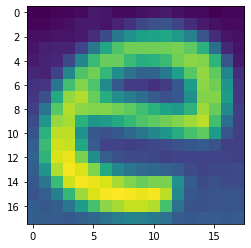

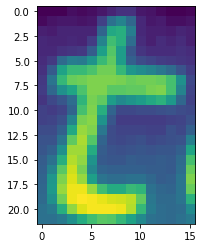

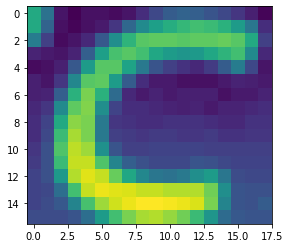

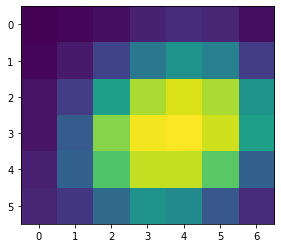

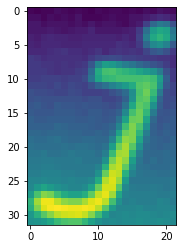

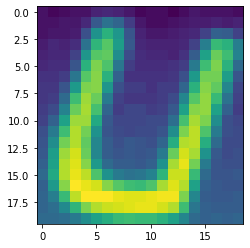

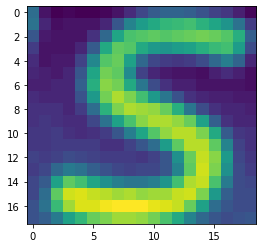

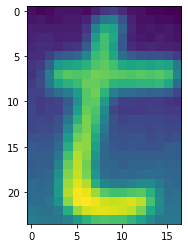

In [15]:
for img in cropped_char_imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.figure()
    plt.imshow(gray)
    plt.show()
    
    """
    detector = cv2.SimpleBlobDetector()
    keypoints = detector.detect(im)
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow("Keypoints", im_with_keypoints)
    """